In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = load_wine()
wine_data = wine.data
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [15]:
wine_data = wine.data
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
df_wine['target'].value_counts()

(target,)
1            71
0            59
2            48
dtype: int64

<AxesSubplot:xlabel='None', ylabel='None'>

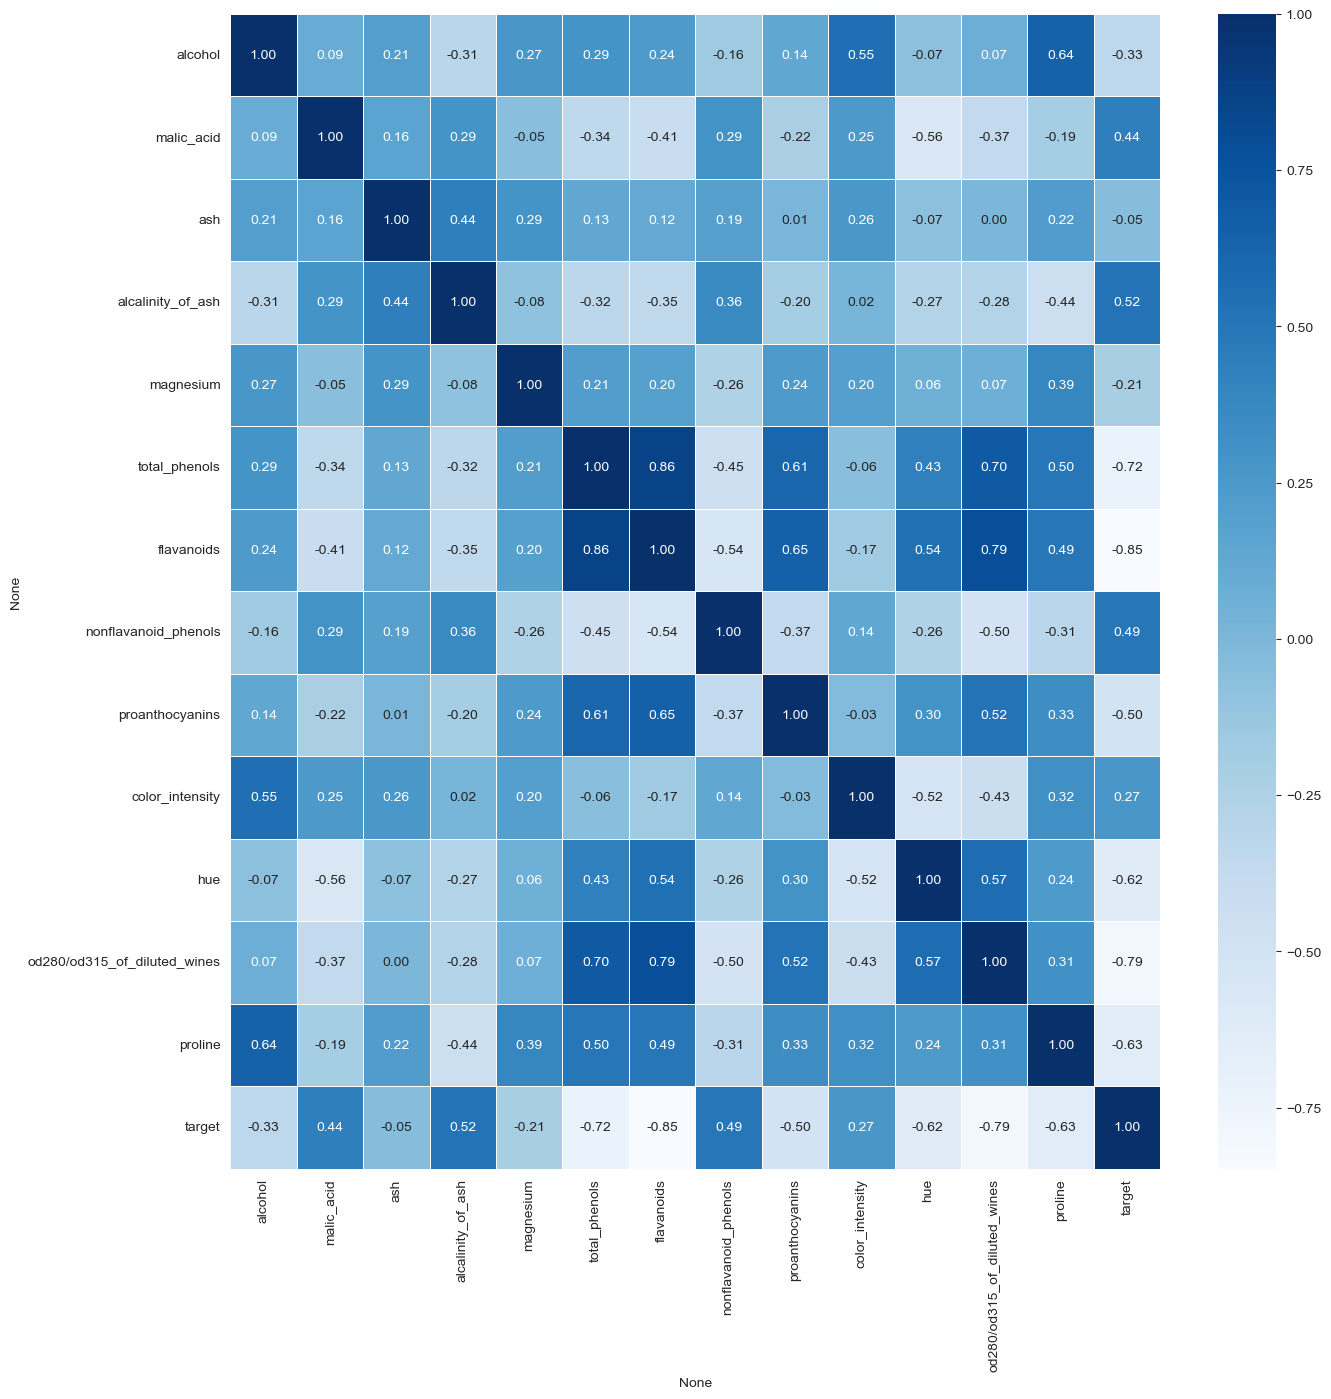

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_wine.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

상관계수를 분석해보면, alcalinity_of_ash(와인의 pH), nonflavanoid_phenols(와인의 폴리페놀 성분)가 target값과 적당한 양의 상관관계를 가지고 있고,
proanthocyanins가 적당한 음의 상관관계, total_phenols(페놀화합물의 총 양), flavanoids(플라보노이드), hue(와인의 색조), od280/od315_of_diluted_wines(와인의 희석된 상태에서의 흡광도 값), proline(와인에 함유된 아미노산 중 하나)가 높은 음의 상관관계를 가지고 있음을 알 수 있다.

In [5]:
df_wine = df_wine.drop(columns=['alcohol', 'malic_acid', 'ash', 'magnesium', 'color_intensity'])
df_wine

/var/folders/26/tc97y9y91mqdvfbhjdvdfcsm0000gn/T/ipykernel_17478/241726556.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_wine = df_wine.drop(columns=['alcohol', 'malic_acid', 'ash', 'magnesium', 'color_intensity'])


,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,od280/od315_of_diluted_wines,proline,target
0,15.6,2.80,3.06,0.28,2.29,1.04,3.92,1065.0,0
1,11.2,2.65,2.76,0.26,1.28,1.05,3.40,1050.0,0
2,18.6,2.80,3.24,0.30,2.81,1.03,3.17,1185.0,0
3,16.8,3.85,3.49,0.24,2.18,0.86,3.45,1480.0,0
4,21.0,2.80,2.69,0.39,1.82,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...
173,20.5,1.68,0.61,0.52,1.06,0.64,1.74,740.0,2
174,23.0,1.80,0.75,0.43,1.41,0.70,1.56,750.0,2
175,20.0,1.59,0.69,0.43,1.35,0.59,1.56,835.0,2
176,20.0,1.65,0.68,0.53,1.46,0.60,1.62,840.0,2


In [6]:
df_wine.columns = [col[0] for col in df_wine.columns]

In [7]:
df_wine

,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,od280/od315_of_diluted_wines,proline,target
0,15.6,2.80,3.06,0.28,2.29,1.04,3.92,1065.0,0
1,11.2,2.65,2.76,0.26,1.28,1.05,3.40,1050.0,0
2,18.6,2.80,3.24,0.30,2.81,1.03,3.17,1185.0,0
3,16.8,3.85,3.49,0.24,2.18,0.86,3.45,1480.0,0
4,21.0,2.80,2.69,0.39,1.82,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...
173,20.5,1.68,0.61,0.52,1.06,0.64,1.74,740.0,2
174,23.0,1.80,0.75,0.43,1.41,0.70,1.56,750.0,2
175,20.0,1.59,0.69,0.43,1.35,0.59,1.56,835.0,2
176,20.0,1.65,0.68,0.53,1.46,0.60,1.62,840.0,2


In [3]:
train_X, test_X, train_y, test_y = train_test_split(wine.data, wine.target, stratify = df_wine['target'], random_state=42, test_size=0.2)

In [4]:
logr = LogisticRegression()
logr.fit(train_X, train_y)

nb = GaussianNB()
nb.fit(train_X, train_y)

dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)

rf = RandomForestClassifier()
rf.fit(train_X, train_y)

/Users/kweonminseong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [5]:
pred_logr = logr.predict(test_X)
pred_nb = nb.predict(test_X)
pred_dtc = dtc.predict(test_X)
pred_rf = rf.predict(test_X)

In [6]:
confusion_matrix(test_y, pred_logr)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  9]])

In [7]:
confusion_matrix(test_y, pred_nb)

array([[12,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]])

In [8]:
confusion_matrix(test_y, pred_dtc)

array([[11,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

In [9]:
confusion_matrix(test_y, pred_rf)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

In [13]:
from sklearn.metrics import accuracy_score

print("logistic regression: {0:.2f}".format(accuracy_score(test_y, pred_logr)))
print("naive bayes: {0:.2f}".format(accuracy_score(test_y, pred_nb)))
print("decision tree: {0:.2f}".format(accuracy_score(test_y, pred_dtc)))
print("random forest: {0:.2f}".format(accuracy_score(test_y, pred_rf)))

logistic regression: 0.97
naive bayes: 0.97
decision tree: 0.97
random forest: 1.00
